<a href="https://colab.research.google.com/github/larcherg/-/blob/main/PF_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача классификации наличия болезни сердца у пациентов

**Цель:** Применить базовые ансамблевые методы и выбрать лучший для решения задачи классификации.

Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. Подробнее о признаках можно прочесть в описании датасета на сайте https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


### 1.Получим данные и загрузим их в рабочую среду.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 2-3.Подготовим датасет к обучению моделей.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Пропусков нет.


---



Проанализируем целевую переменную и признаки:

In [ ]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

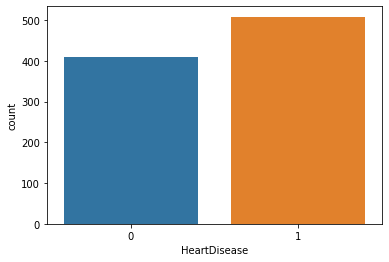

In [ ]:
sns.countplot(x='HeartDisease', data=df);

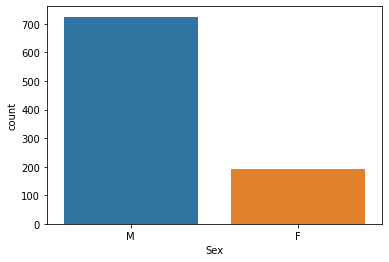

In [ ]:
sns.countplot(x='Sex', data=df);

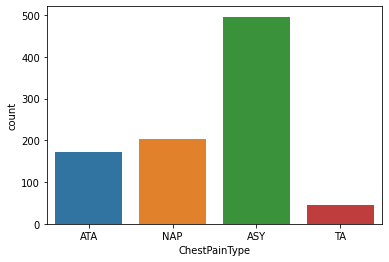

In [ ]:
sns.countplot(x='ChestPainType', data=df);

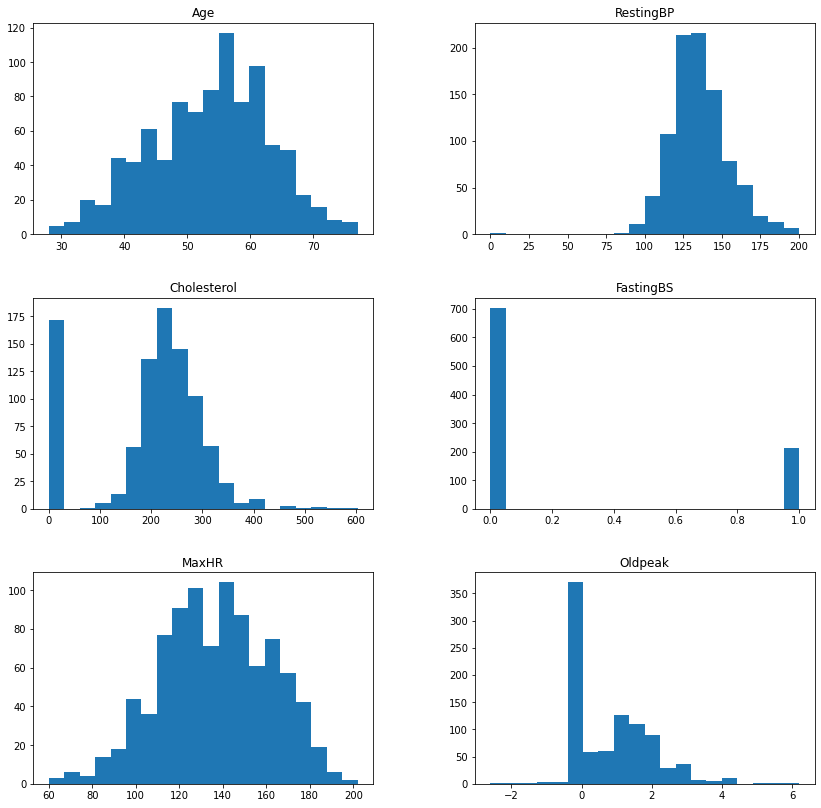

In [ ]:
X.hist(figsize=(14, 14), bins=20, grid=False);



---


Разделeние выборки на обучающее и тестовое подмножество:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Превод категориальныx переменных в цифровые значения:

In [ ]:
X.select_dtypes('object').columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
X['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
X['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
X['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_test['Sex'] = le.transform(X_test['Sex'])

X_train['ExerciseAngina'] = le.fit_transform(X_train['ExerciseAngina'])
X_test['ExerciseAngina'] = le.transform(X_test['ExerciseAngina'])

In [ ]:
select_cols = ['ChestPainType','RestingECG','ST_Slope']

dummy_train = pd.get_dummies(X_train[select_cols], columns=select_cols)
dummy_test = pd.get_dummies(X_test[select_cols], columns=select_cols)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

X_train = pd.concat([X_train.drop(columns=select_cols), dummy_train], axis=1)
X_test = pd.concat([X_test.drop(columns=select_cols), dummy_test], axis=1)

In [ ]:
# датасет после обработки
X_train.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_NAP,RestingECG_LVH,ChestPainType_ASY,ST_Slope_Up,RestingECG_ST,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,RestingECG_Normal,ChestPainType_ATA
795,42,1,120,240,1,194,0,0.8,1,0,0,0,0,0,1,0,1,0
25,36,1,130,209,0,178,0,0.0,1,0,0,1,0,0,0,0,1,0
84,56,1,150,213,1,125,1,1.0,0,0,1,0,0,0,0,1,1,0
10,37,0,130,211,0,142,0,0.0,1,0,0,1,0,0,0,0,1,0
344,51,1,120,0,1,104,0,0.0,0,0,1,0,0,0,0,1,1,0


### 4.Обучим дерево решений на обучающем множестве. 
Используем следующие модели:

a) tree.DecisionTreeClassifier

b) ensemble.RandomForestClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tr = DecisionTreeClassifier(random_state=1)
tr.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### 5.Для тестового множества сделаем предсказание целевой переменной и выведите метрики для каждой построенной модели.

In [ ]:
y_pred_tr = tr.predict(X_test)
y_pred_tr[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_rf[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('Decision Tree')
print(classification_report(y_test, y_pred_tr))

Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        77
           1       0.88      0.76      0.81       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184



In [ ]:
print('Random Forest')
print(classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



### 6.Выведем важность признаков, полученную после обучения модели из п. 4b

In [ ]:
imp = pd.Series(rf.feature_importances_)

In [ ]:
imp.index = pd.Series(X_train.columns)

In [ ]:
imp = imp.sort_values(ascending=False)
imp 

ST_Slope_Up          0.171780
ST_Slope_Flat        0.104644
Oldpeak              0.100486
MaxHR                0.095808
Cholesterol          0.095018
ExerciseAngina       0.089771
Age                  0.080466
RestingBP            0.062191
ChestPainType_ASY    0.059529
Sex                  0.038582
ChestPainType_ATA    0.026481
FastingBS            0.018378
RestingECG_LVH       0.012140
ChestPainType_NAP    0.011718
RestingECG_Normal    0.011419
RestingECG_ST        0.009194
ST_Slope_Down        0.007751
ChestPainType_TA     0.004643
dtype: float64

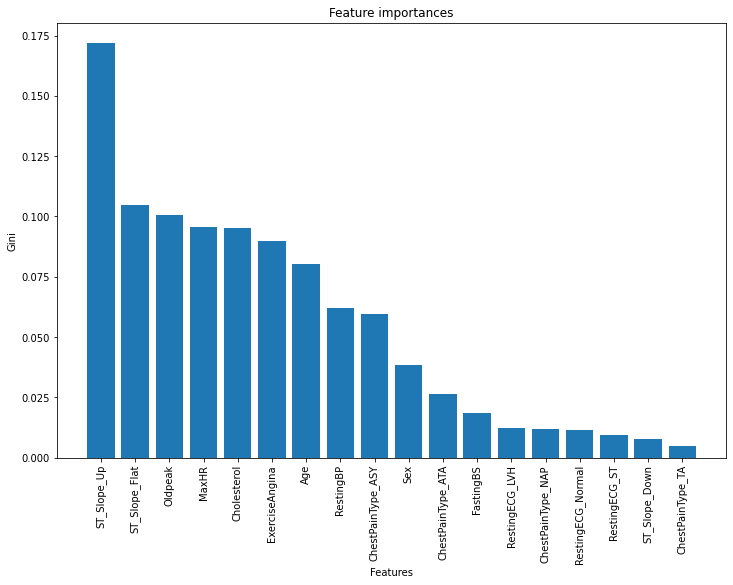

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.xticks(rotation=90)
plt.bar(imp.index, imp)
plt.show()

### 7.Обучим бэггинг над моделью из п. 4a. и посмотрим метрики.

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag = BaggingClassifier(tr, n_estimators=20, random_state=1)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=20, random_state=1)

In [ ]:
y_pred_bag = bag.predict(X_test)
y_pred_bag[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
print('Bagging')
print(classification_report(y_test, y_pred_bag))

Bagging
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### 8.Обучим стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC и посмотрим метрики

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
# нормализуем данные для обучения модели LinearSVC
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
st = StackingClassifier(
    [ 
        ('DecisionTree', tr),
        ('RandomForest', rf),
        ('LinearSVC', LinearSVC(max_iter=2000))
    ], SVC())

st.fit(X_train_norm, y_train)

StackingClassifier(estimators=[('DecisionTree',
                                DecisionTreeClassifier(random_state=1)),
                               ('RandomForest',
                                RandomForestClassifier(random_state=1)),
                               ('LinearSVC', LinearSVC(max_iter=2000))],
                   final_estimator=SVC())

In [ ]:
y_pred_st = st.predict(X_test_norm)
y_pred_st[:10]

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
print('Stacking')
print(classification_report(y_test, y_pred_st))

Stacking
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### 9.Выводы по проделанной работе.


In [ ]:
print('Decision Tree')
print(classification_report(y_test, y_pred_tr))

print('Random Forest')
print(classification_report(y_test, y_pred_rf))

print('Bagging')
print(classification_report(y_test, y_pred_bag))

print('Stacking')
print(classification_report(y_test, y_pred_st))

Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        77
           1       0.88      0.76      0.81       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

Bagging
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86     

**Выводы:**

Ансамбли моделей имеют лучшие метрики, чем одиночная модель Дерево решений.

Из ансамблей лучшие метрики получились у модели Random Forest.  